In [1]:
#DATASET GENERATION
import numpy as np
import os
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
%matplotlib inline
cwd=os.getcwd()
print("PACHAGES LOADED")

PACHAGES LOADED


In [27]:

#FOLDER LOCATIONS
paths=["../images/1"
       ,"../images/2"
       ,"../images/3"
       ,"../images/4"
      ]
categories=['A','B','C','D']

#CONFIGURATION
imgsize=[64,64]
use_gray=1#0이면 칼라, 1이면 회색
data_name="custom_data"

print("YOUR IMAGES SHOULD BE AT")
for i,path in enumerate(paths):
    print(" [%d/%d] %s" %(i,len(paths),path))
print("DATA WILL BE SAVED TO \n [%s]"
     %(cwd+'/data/'+data_name+'.npz'))#npz=numpyzip

YOUR IMAGES SHOULD BE AT
 [0/4] ../images/1
 [1/4] ../images/2
 [2/4] ../images/3
 [3/4] ../images/4
DATA WILL BE SAVED TO 
 [C:\Users\pc\Desktop\논문구현/data/custom_data.npz]


In [28]:
#RGB2GRAY
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3],[0.299,0.584,0.114])
    else:
        return rgb

In [29]:
#ROAD IMAGES
nclass = len(paths)
valid_exts=[".jpg",".gif",".png",".tga",".jpeg"]
imgcnt=0
for i, relpath in zip(range(nclass),paths):
    path=cwd+"/"+relpath
    flist=os.listdir(path)
    for f in flist:
        if os.path.splitext(f)[1].lower() not in valid_exts:
            continue
        fullpath = os.path.join(path,f)
        currimg = imread(fullpath)
        #CONVERT TO GRAY(IF REQUIRED)
        if use_gray:
            grayimg=rgb2gray(currimg)
        else:
            grayimg=currimg
        #RESIZE
        graysmall=imresize(grayimg, [imgsize[0],imgsize[1]])/255.#동일한 사이즈로 만들어서
        grayvec=np.reshape(graysmall, (1,-1))#한줄로 핀다
        #SAVE
        curr_label=np.eye(nclass,nclass)[i:i+1,:]
        if imgcnt is 0:
            totalimg = grayvec
            totallabel=curr_label
        else:
            totalimg = np.concatenate((totalimg, grayvec),axis=0)
            totallabel = np.concatenate((totallabel, curr_label),axis=0)
        imgcnt = imgcnt+1
print("TOTAL %d IMAGES"%(imgcnt))

C:\Users\pc\Anaconda3\envs\five\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if sys.path[0] == '':
C:\Users\pc\Anaconda3\envs\five\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


TOTAL 30 IMAGES


In [30]:
#DIVIDE INTO TRAINING AND TEST
def print_shape(string,x):
    print("SHAPE OF [%s] IS [%s]"%(string, x.shape,))

randidx = np.random.randint(imgcnt, size=imgcnt)
trainidx = randidx[0:int(4*imgcnt/5)]#80퍼센트를 트레인데이터로 넣겠다는 뜻
testidx = randidx[int(4*imgcnt/5):imgcnt]#나머지를 테스트데이터로 넣음

trainimg = totalimg[trainidx,:]
trainlabel = totallabel[testidx,:]

testimg = totalimg[testidx,:]
testlabel = totallabel[testidx,:]

print_shape("totalimg",totalimg)
print_shape("totallabel",totallabel)
print_shape("trainimg",trainimg)
print_shape("trainlabel",trainlabel)
print_shape("testimg",testimg)
print_shape("testlabel",testlabel)#12288=64*64*3(rgb니까~)

SHAPE OF [totalimg] IS [(30, 4096)]
SHAPE OF [totallabel] IS [(30, 4)]
SHAPE OF [trainimg] IS [(24, 4096)]
SHAPE OF [trainlabel] IS [(6, 4)]
SHAPE OF [testimg] IS [(6, 4096)]
SHAPE OF [testlabel] IS [(6, 4)]


In [31]:
#SAVE TO NPZ
savepath = cwd +"/data/"+data_name+".npz"
np.savez(savepath, trainimg=trainimg, trainlabel=trainlabel
        , testimg=testimg, testlabel=testlabel
        ,imgsize=imgsize, use_gray=use_gray, categories=categories)
print("SAVED TO [%s]"%(savepath))

SAVED TO [C:\Users\pc\Desktop\논문구현/data/custom_data.npz]


In [32]:
#LOAD NPZ
#LOAD
cwd=os.getcwd()
loadpath=cwd+"/data/"+data_name+".npz"
l=np.load(loadpath)
print(l.files)

#Parse data
trainimg_loaded = l['trainimg']
trainlabel_loaded = l['trainlabel']
testimg_loaded = l['testimg']
testlabel_loaded = l['testlabel']
categories_loaded = l['categories']

print("[%d] TRAINING IMAGES" %(trainimg_loaded.shape[0]))
print("[%d] TEST IMAGES" %(testimg_loaded.shape[0]))
print("LOADED FROM [%s]"%(savepath))

['trainimg', 'trainlabel', 'testimg', 'testlabel', 'imgsize', 'use_gray', 'categories']
[24] TRAINING IMAGES
[6] TEST IMAGES
LOADED FROM [C:\Users\pc\Desktop\논문구현/data/custom_data.npz]


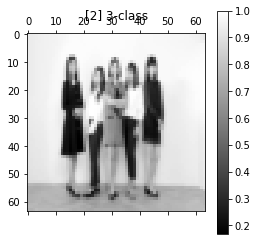

IndexError: index 14 is out of bounds for axis 0 with size 6

In [39]:
#PLOT LOADED DATA
ntrain_loaded = trainimg_loaded.shape[0]
batch_size = 3;
randidx = np.random.randint(ntrain_loaded, size=batch_size)
for i in randidx: 
    currimg = np.reshape(trainimg_loaded[i, :], (imgsize[0], -1))
    currlabel_onehot = trainlabel_loaded[i, :]
    currlabel = np.argmax(currlabel_onehot) 
    if use_gray:
        currimg = np.reshape(trainimg[i, :], (imgsize[0], -1))
        plt.matshow(currimg, cmap=plt.get_cmap('gray'))
        plt.colorbar()
    else:
        currimg = np.reshape(trainimg[i, :], (imgsize[0], imgsize[1], 3))
        plt.imshow(currimg)
    title_string = "[%d] %d-class" % (i, currlabel)
    plt.title(title_string) 
    plt.show()